### Introduction:
This analysis delves into the 2024 Stack Overflow Developer Survey results, focusing on understanding developer demographics, work habits, job satisfaction, and technical preferences. 

The study explores a range of topics, including age distribution, professional roles, compensation, remote work trends, coding activities outside work, and the most popular tools, languages, and databases used by developers. 

The goal is to extract key insights into how developers work, learn, and interact with technology in their professional and personal lives.

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/0/02/Stack_Overflow_logo.svg" width="600" alt="Stack Overflow Logo">
</div>

In [1]:
#!pip3 install -r requirements.txt --quiet

In [2]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import requests
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] =  (22,5)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [3]:
#Loading the survey results
results = pd.read_parquet('results.parquet')
results.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
print(f"There are {results.shape[0]} rows and {results.shape[1]} columns in the dataset")

There are 65437 rows and 114 columns in the dataset


In [5]:
#Loading the schema
schema = pd.read_csv('results_schema.csv')
schema.head()

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR


In [6]:
print(f"There are {schema.shape[0]} questions in the schema dataset and {results.shape[0]} respondents in the results dataset")

There are 87 questions in the schema dataset and 65437 respondents in the results dataset


## EDA

**What is the age distribution of the respondents?**

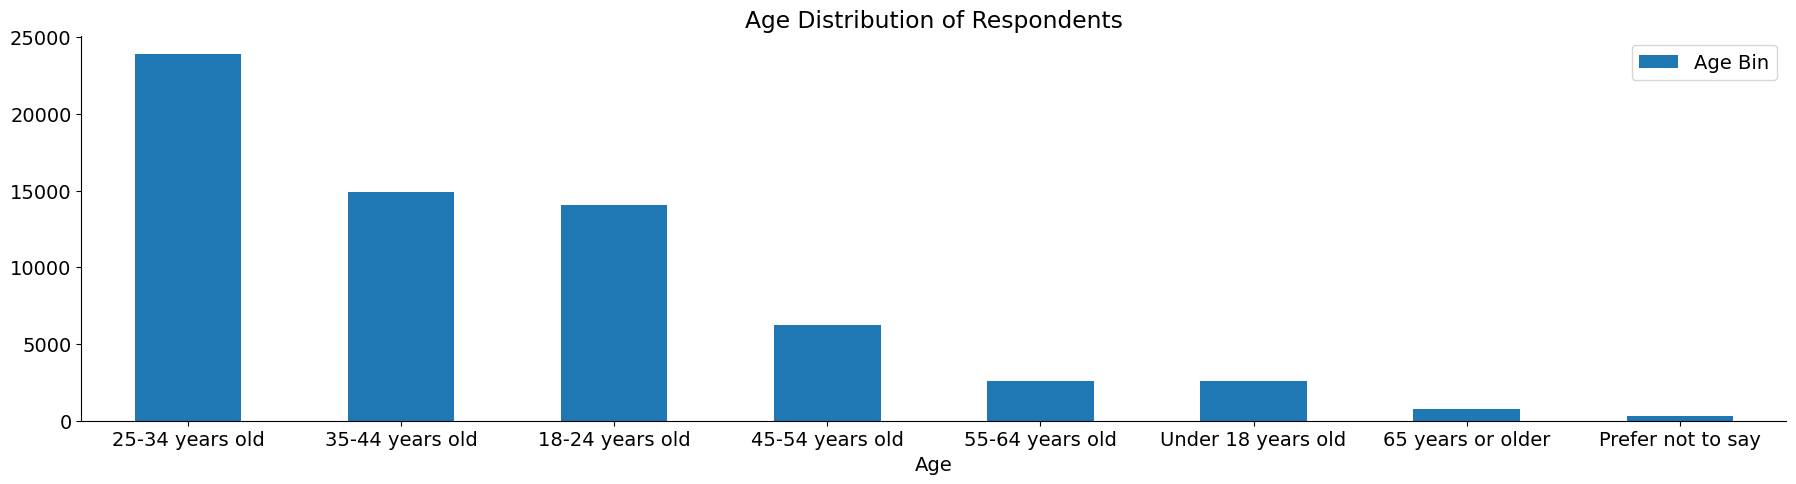

In [7]:
results['Age'].value_counts().plot(kind='bar', label='Age Bin')
plt.title('Age Distribution of Respondents')
plt.xticks(rotation=0)
plt.legend()
plt.show()

**INSIGHT**

- Most of the respondents are between the age of 25 and 34 years old.

**How many % of respondents work professionally as a developer?**

In [8]:
round(results['MainBranch'].value_counts()/len(results)*100,2).to_frame()\
                            .reset_index().rename(columns={'count':'Percentage'})

,MainBranch,Percentage
0,I am a developer by profession,76.73
1,"I am not primarily a developer, but I write co...",9.95
2,I am learning to code,5.92
3,I code primarily as a hobby,5.09
4,"I used to be a developer by profession, but no...",2.31


**What is the age distribution of respondents who code professionally?**

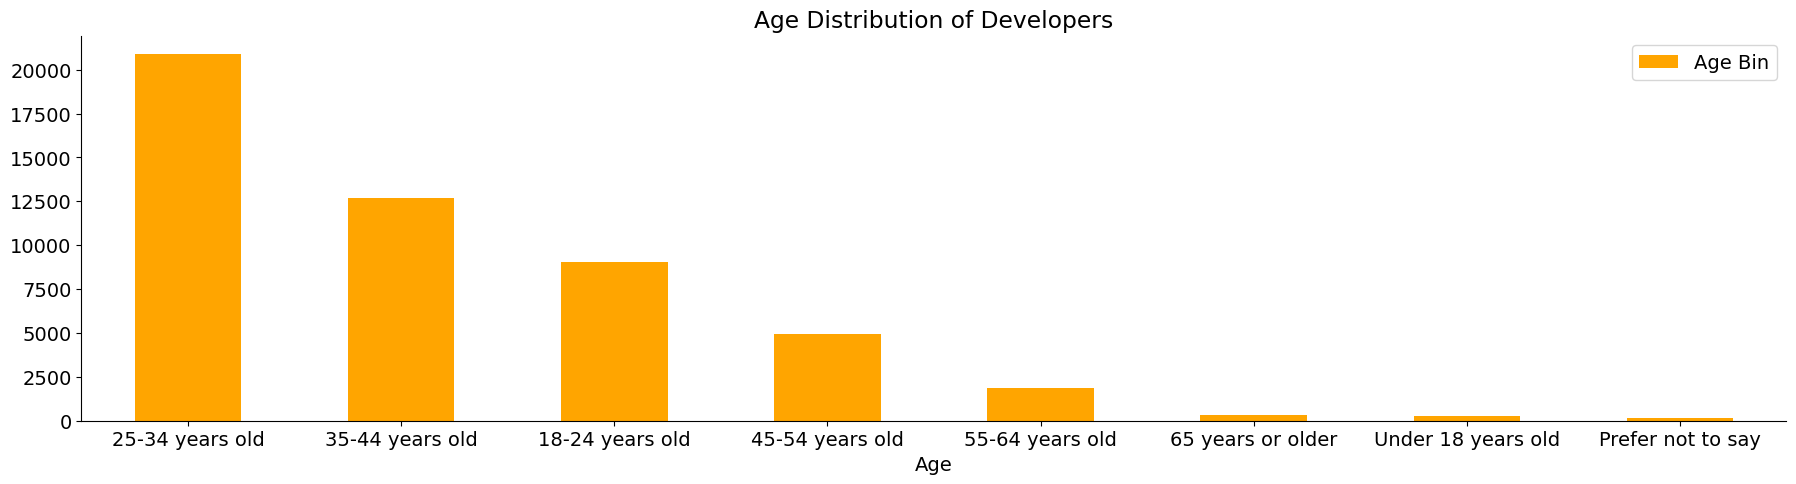

In [9]:
results.query('MainBranch=="I am a developer by profession"')['Age'].value_counts().plot(kind='bar', label='Age Bin', color='orange')
plt.title('Age Distribution of Developers')
plt.xticks(rotation=0)
plt.legend()
plt.show()

**INSIGHT**

- Most of the folks who code professionally and non professionally have the similar age range which is 18 to 54 years old.

In [10]:
developer_os_pct = round(results.query('MainBranch=="I am a developer by profession"')['CodingActivities']\
                .str.contains('Contribute to open-source projects').sum()\
                /len(results.query('MainBranch=="I am a developer by profession"'))*100,2)
print(f"{developer_os_pct}% of the professional developers contribute to open source as their hobby.")

23.47% of the professional developers contribute to open source as their hobby.


Top 5 Coding Activities of Professional Developers outside of work

In [11]:
results.query('MainBranch=="I am a developer by profession"')['CodingActivities'].value_counts().head(5)

CodingActivities
Hobby                                                                        8721
I don’t code outside of work                                                 5877
Hobby;Professional development or self-paced learning from online courses    5499
Hobby;Contribute to open-source projects                                     3291
Professional development or self-paced learning from online courses          2689
Name: count, dtype: int64

In [12]:
beginner_os_pct = round(results.query('MainBranch!="I am a developer by profession"')['CodingActivities']\
                .str.contains('Contribute to open-source projects').sum()\
                /len(results.query('MainBranch!="I am a developer by profession"'))*100,2)
print(f"{beginner_os_pct}% of the non-professional developers contribute to open source as their hobby.")

12.69% of the non-professional developers contribute to open source as their hobby.


Top 5 Coding Activities of Non Professional Developers outside of work

In [13]:
results.query('MainBranch!="I am a developer by profession"')['CodingActivities'].value_counts().head(5)

CodingActivities
Hobby                                                                        1272
Hobby;Professional development or self-paced learning from online courses     704
I don’t code outside of work                                                  631
Hobby;Contribute to open-source projects                                      441
Hobby;School or academic work                                                 432
Name: count, dtype: int64

**Show the remote work distribution of the respondents** 

In [14]:
round(results['RemoteWork'].value_counts()/len(results)*100,2).to_frame()\
                .reset_index().rename(columns={'count':'Percentage'})

,RemoteWork,Percentage
0,"Hybrid (some remote, some in-person)",35.17
1,Remote,31.83
2,In-person,16.75


**What are the type of developers that are there in our survey?**

In [15]:
developers = results.query('MainBranch == "I am a developer by profession"')
length =  developers.shape[0]

round(results.query('MainBranch == "I am a developer by profession"')['DevType'].value_counts()/length*100,2)\
                    .to_frame().reset_index().rename(columns={'count':'Percentage'})

,DevType,Percentage
0,"Developer, full-stack",34.32
1,"Developer, back-end",18.96
2,"Developer, front-end",6.07
3,"Developer, desktop or enterprise applications",4.54
4,"Developer, mobile",3.72
5,"Developer, embedded applications or devices",3.04
6,Other (please specify):,2.15
7,Data engineer,1.95
8,Engineering manager,1.88
9,Student,1.63


**INSIGHT**

- Majority of the devs either work as front-end, back-end or full stack developer.

Since there is no one common currency, we will make an HTTP request to a website and pull the data from there and convert all the values to a USD equivalent value which can then make sense and further be explored for data analysis.

In [16]:
#Creating a new column for currency symbol
developers['Currency_Symbols'] = developers['Currency'].str.split("\t").str.get(0).str.split(" ").str.get(0)

# Where USD is the base currency you want to use
url = 'https://v6.exchangerate-api.com/v6/d93b586cfb678435f9e8eab2/latest/USD'

# Making our request
response = requests.get(url)
data = response.json()

rates = [
    [data['conversion_rates'][i] if i is not None and i in data['conversion_rates'].keys() else \
            None for i in developers['Currency_Symbols']]
]

#converting the python list `rates` into a numpy array and flattening it to make it 1D
developers['Exch_Rate'] =  np.array(rates).ravel()

#Converting the Compensation into a Common Currency which is USD in our case
developers['Comp_USD'] = np.around(developers[developers['Exch_Rate']>0]['CompTotal']\
                                   /developers[developers['Exch_Rate']>0]['Exch_Rate'],2)

**What is the org size distribution of the developers?**

In [17]:
round(developers['OrgSize'].value_counts()/len(developers)*100,2).to_frame()\
                                        .reset_index().rename(columns={'count':'Percentage'})

,OrgSize,Percentage
0,20 to 99 employees,18.15
1,100 to 499 employees,15.90
2,"10,000 or more employees",9.77
3,"1,000 to 4,999 employees",9.44
4,2 to 9 employees,8.91
5,10 to 19 employees,7.61
6,500 to 999 employees,5.73
7,"Just me - I am a freelancer, sole proprietor, ...",5.32
8,"5,000 to 9,999 employees",3.24
9,I don’t know,1.77


**INSIGHT**

- 18% Devs work in organisations that have 20 to 99 employees
- 15% work in 100 to 499 Employees' organization while 9% devs work in organizations with the headcount of 1k to 5k Employees and 10k+ employees.

In [18]:
#Country Wise Split
countries = ['United States of America', 'Germany', 'India']
developers.pivot_table(index='OrgSize',columns='Country', 
                                aggfunc='size', fill_value=0).reset_index()\
                                .rename_axis(columns=None).set_index('OrgSize')[countries].reset_index()

,OrgSize,United States of America,Germany,India
0,"1,000 to 4,999 employees",997,419,283
1,10 to 19 employees,456,304,218
2,"10,000 or more employees",1570,366,502
3,100 to 499 employees,1455,755,445
4,2 to 9 employees,604,320,259
5,20 to 99 employees,1236,772,525
6,"5,000 to 9,999 employees",436,134,117
7,500 to 999 employees,542,264,187
8,I don’t know,191,59,57
9,"Just me - I am a freelancer, sole proprietor, ...",439,178,154


**INSIGHT**

- In all top 3 countries as well, we see a similar trend that majority of the devs work in organizations that have less than 500 employees.

**Visualize the compensation the developers**

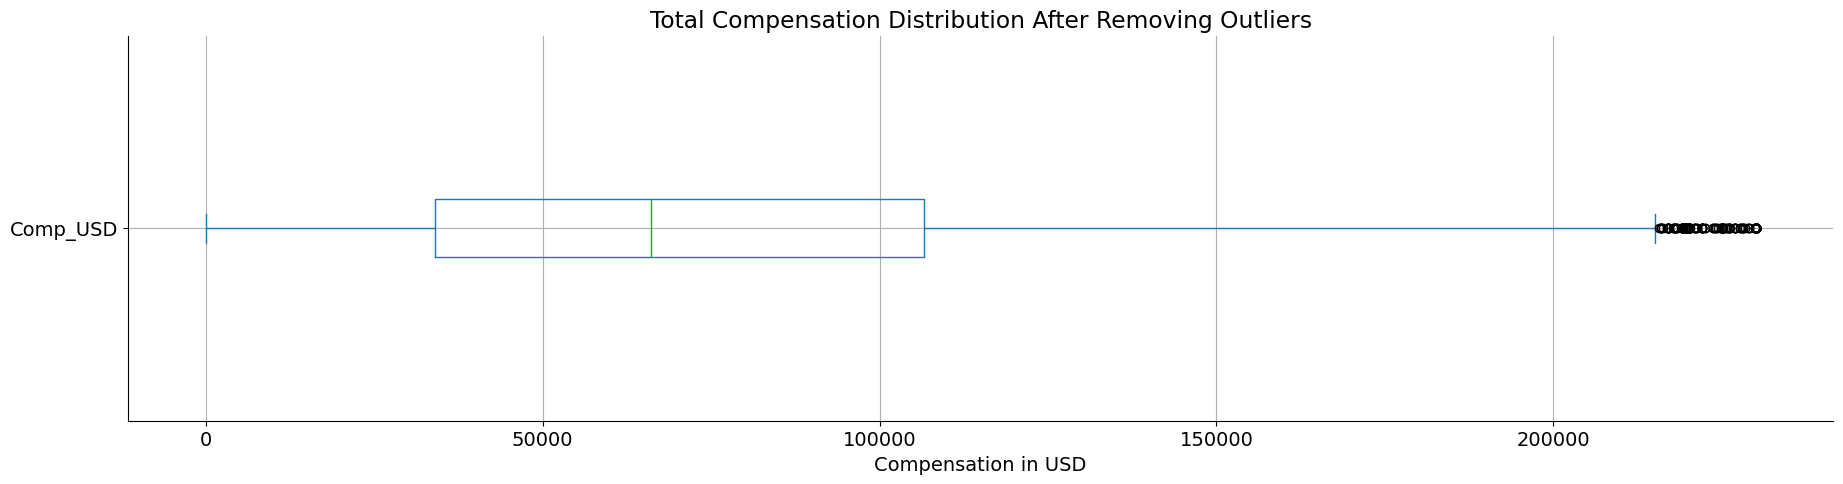

In [19]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = developers['Comp_USD'].quantile(0.25)
Q3 = developers['Comp_USD'].quantile(0.75)

# Step 2: Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 3: Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame to remove outliers
filtered_data = developers[(developers['Comp_USD'] >= lower_bound) & 
                           (developers['Comp_USD'] <= upper_bound)]

# Step 5: Plot the cleaned data
filtered_data['Comp_USD'].plot(kind='box', vert=False, grid=True, 
                               title='Total Compensation Distribution After Removing Outliers')
plt.xlabel('Compensation in USD')
plt.show()

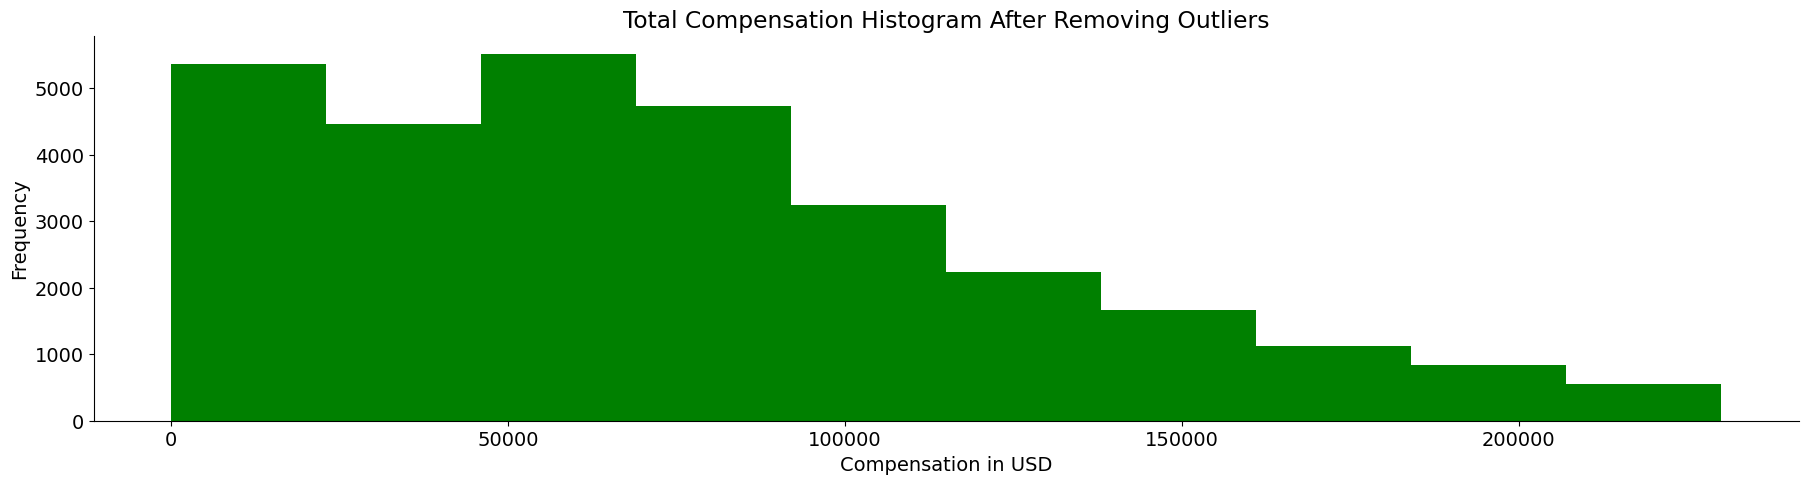

In [20]:
filtered_data['Comp_USD'].plot(kind='hist', title='Total Compensation Histogram After Removing Outliers', color='green')
plt.xlabel('Compensation in USD')
plt.show()

**INSIGHT**

- By using the boxplot and the histogram, we can conclude that most developers are within the 70,000 USD range. Let's take a look at the experience range of folks with salary comp of greater than 70,000 USD.

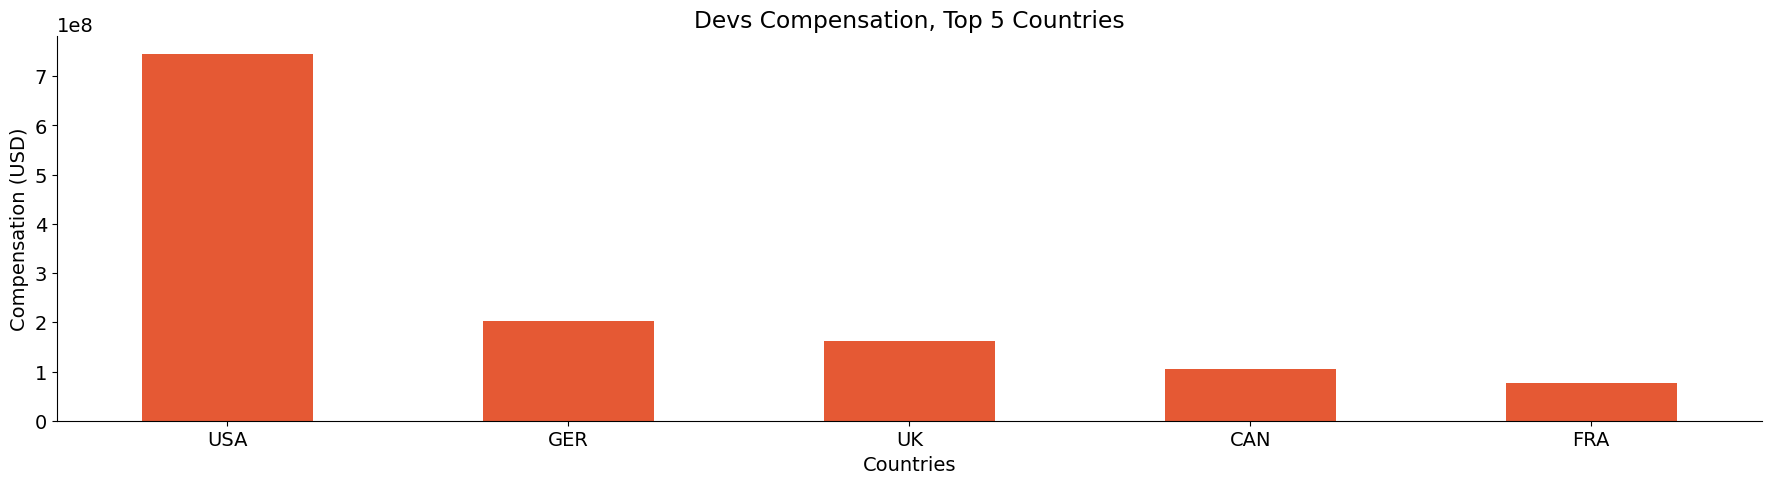

In [21]:
LENGTH = len(filtered_data.groupby('Country')['Comp_USD'].sum())
LABELS =  ['USA', 'GER', 'UK', 'CAN', 'FRA']
filtered_data.groupby('Country')['Comp_USD'].sum().sort_values(ascending=False).head(5).plot(kind='bar', color='#E55934')
plt.title('Devs Compensation, Top 5 Countries')
plt.xlabel('Countries')
plt.ylabel('Compensation (USD)')
plt.xticks(rotation=0, ticks=range(5), labels=LABELS)
plt.show()

**INSIGHT**

- USA Devs get the most highest compensation among other countries which is probably why the devs from other countries try to make it to USA as a Developer there.

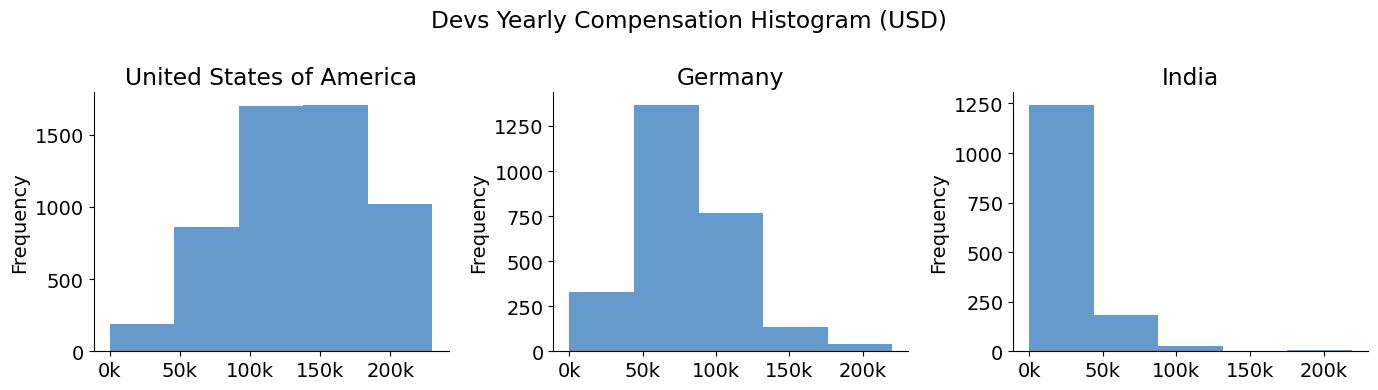

In [22]:
# Define the number of subplots: 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(14, 4))  # Adjusted the figure size for better visibility

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each country's data in a separate subplot
for i, country in enumerate(countries):
    if i < 3:  # Ensure we don't exceed the number of available subplots
        filtered_data.query(f'Country == "{country}"')['Comp_USD'].plot(kind='hist', bins=5, ax=axes[i], color="#6699CC")
        axes[i].set_title(f'{country}')
        # Manually set the x-ticks to ensure "50k" is included
        x_ticks = [0, 50000, 100000, 150000, 200000]  # Example positions in numeric format
        axes[i].set_xticks(x_ticks)
        axes[i].set_xticklabels([f'{int(x/1000)}k' for x in x_ticks])

plt.suptitle("Devs Yearly Compensation Histogram (USD)")
# Adjust the layout
plt.tight_layout()
plt.show()

**INSIGHT**

- The Compensation in USA is ranging between 100 to 175k USD but the same in India is between 0 to 50k USD

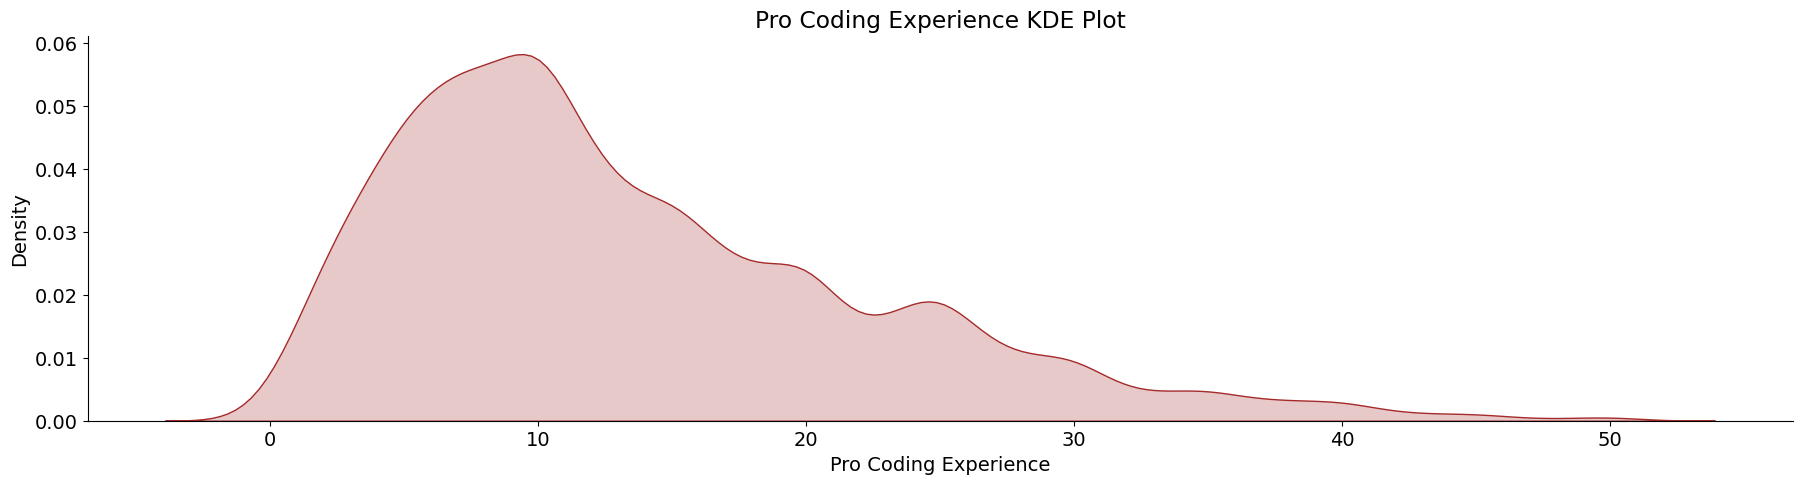

In [23]:
mapping_dict = {
    'More than 50 years': '50',
    'Less than 1 year': '1',
    None: '0'
}

series = pd.to_numeric(developers[developers['Comp_USD'] > 70000]['YearsCodePro'].map(mapping_dict).fillna(developers['YearsCodePro']))
# Plotting the KDE plot
sns.kdeplot(series, color='brown', fill='brown')
plt.title('Pro Coding Experience KDE Plot')
plt.xlabel('Pro Coding Experience')
plt.ylabel('Density')
plt.show()

**INSIGHT**

- Most of the developers that have more than 70,000 USD Compensation have more than 10 years of experience which is only 5% of the lot

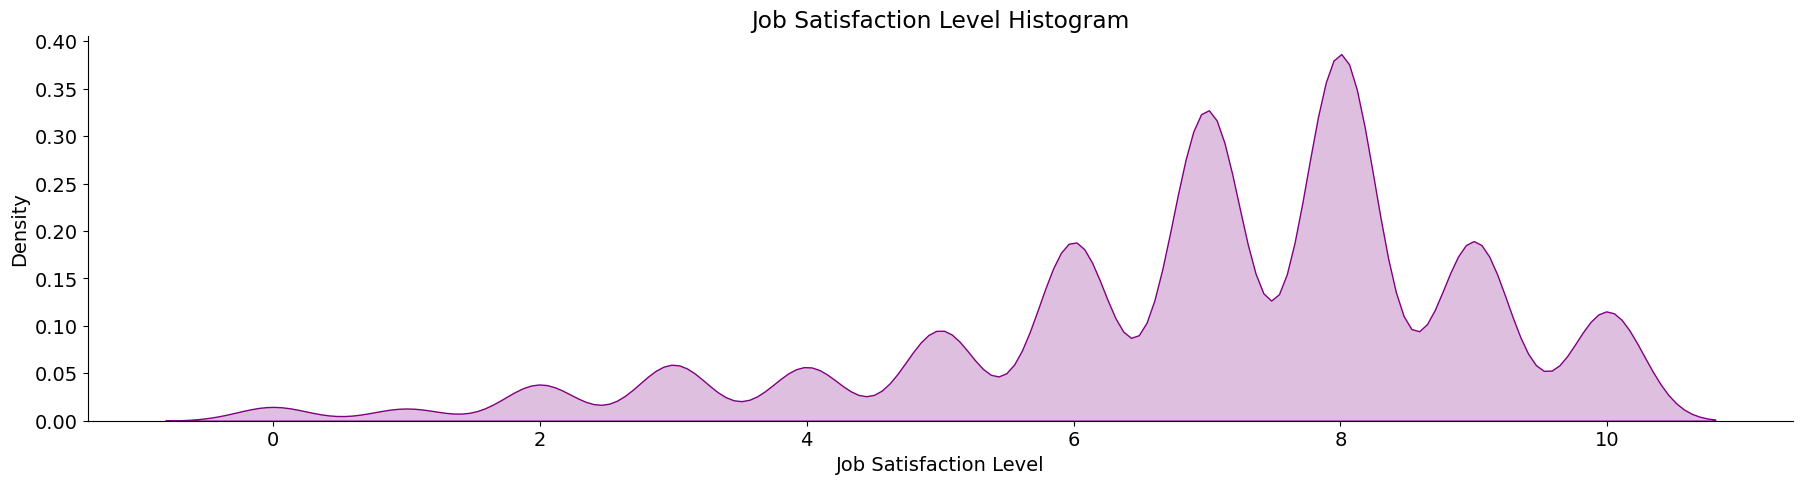

In [24]:
temp = developers[list(developers.columns[1:8]) + \
                    list(developers.columns[ developers.columns.str.contains('JobSat')])]\
                        .query("JobSat>=0")


sns.kdeplot(temp['JobSat'], color='purple', fill='purple')
plt.xlabel('Job Satisfaction Level')
plt.title('Job Satisfaction Level Histogram')
plt.ylabel('Density')
plt.show()

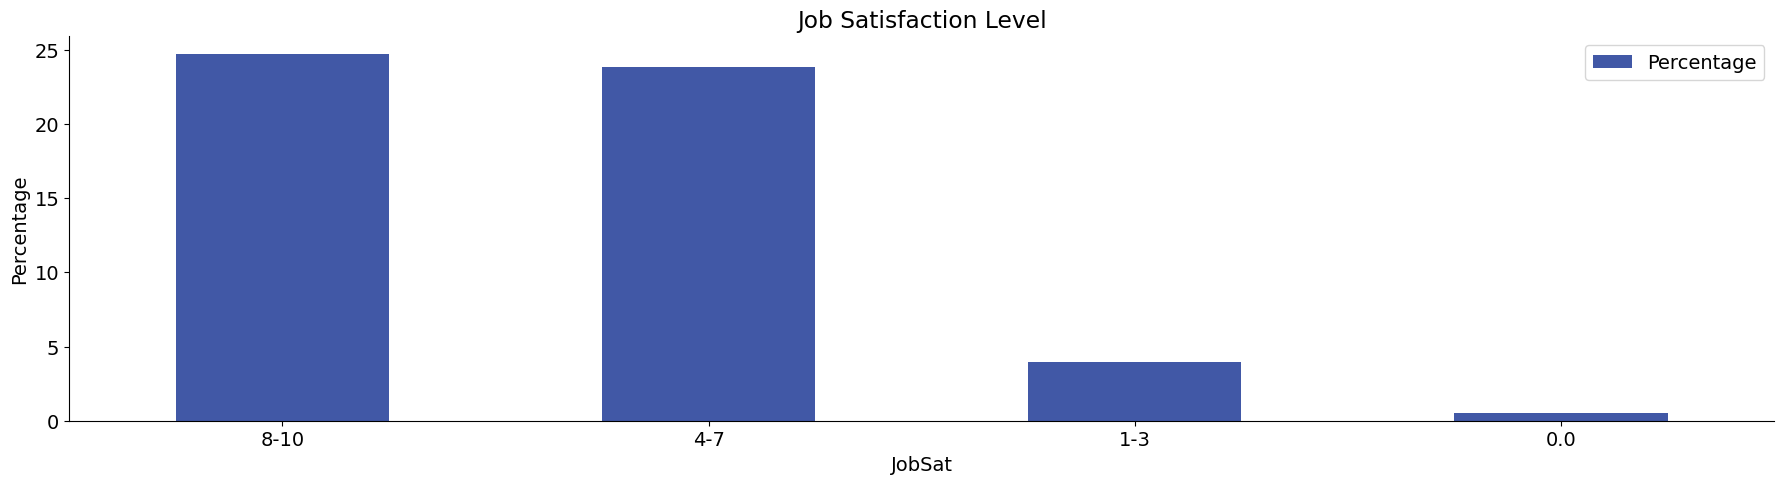

In [25]:
round(developers.query("JobSat>=0")['JobSat'].case_when([
    ((developers.JobSat >= 1)& (developers.JobSat <=3), "1-3"),
    ((developers.JobSat >= 4)& (developers.JobSat <=7), "4-7"),
    ((developers.JobSat >= 8)& (developers.JobSat <=10), "8-10")
    ]).value_counts()/len(developers)*100,2)\
        .to_frame()\
        .reset_index()\
        .rename(columns={'count':'Percentage'})\
        .set_index('JobSat')\
        .plot(kind='bar', color='#4158A6')
plt.title('Job Satisfaction Level')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.show()

INSIGHT

- 25% of the developers are quite satisfied with their jobs.

In [29]:
indices = developers.query("JobSat>=0").index
developers['JobSat_Bin'] = None

#new case_when has been added in pandas which gets a tuple of the (condition, value)
developers.loc[indices, 'JobSat_Bin'] = developers.query("JobSat>=0")['JobSat'].case_when([
    ((developers.JobSat >= 1)& (developers.JobSat <=3), "1-3"),
    ((developers.JobSat >= 4)& (developers.JobSat <=7), "4-7"),
    ((developers.JobSat >= 8)& (developers.JobSat <=10), "8-10")
    ]).values

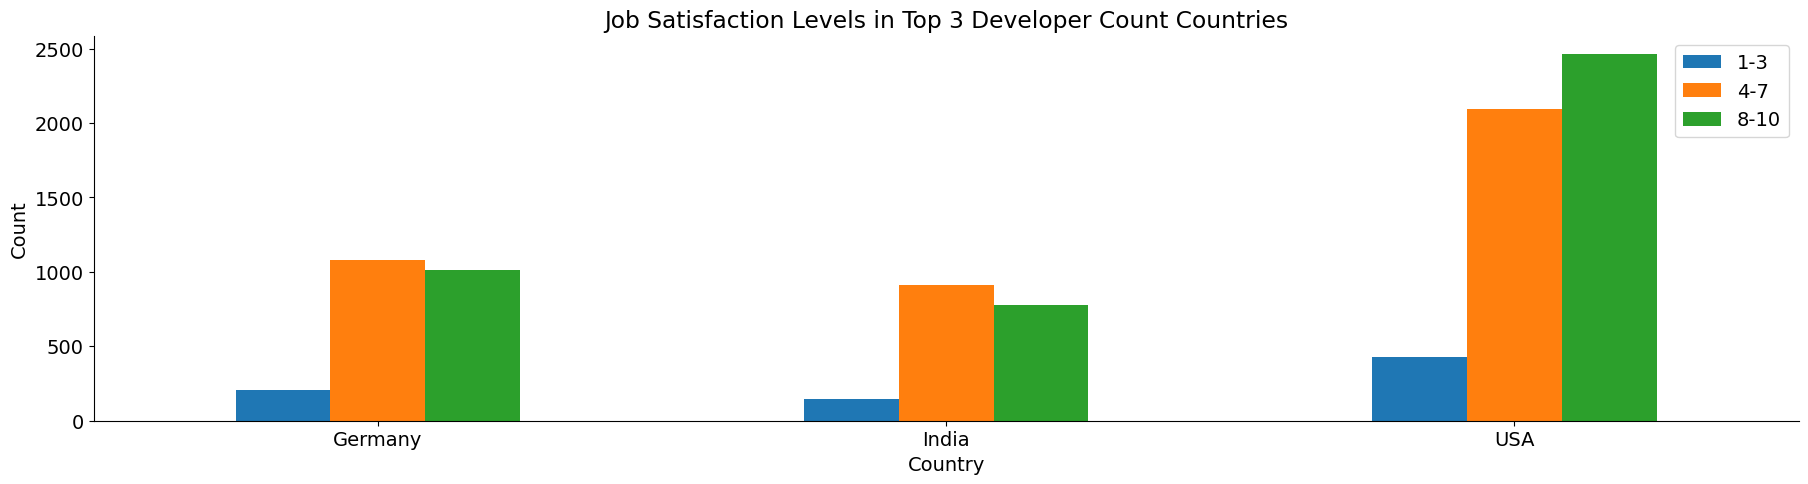

In [32]:
# Define your list of countries
selected_countries = ['United States of America', 'Germany', 'India']

# Use the query method with the in condition
developers.query('JobSat > 0 & Country in @selected_countries')\
    .pivot_table(
        index='Country', 
        columns='JobSat_Bin', 
        aggfunc='size', 
        fill_value=0
    ).reset_index().rename_axis(columns=None).set_index('Country').plot(kind='bar')


LABELS = ['Germany', 'India', 'USA']
plt.xticks(rotation=0, ticks=range(len(LABELS)), labels=LABELS)
plt.title('Job Satisfaction Levels in Top 3 Developer Count Countries')
plt.ylabel('Count')
plt.show()

**INSIGHT**

- Job Satisfaction is the most in USA in all three categories but its remarkably high in 8 to 10 segment.
- In India and Germany, most devs have a Job Satisfaction level between 4 to 7 tapering down in the 8 to 10 Segment.

Top 10 Languages Worked With

In [33]:
languages = developers['LanguageHaveWorkedWith'].str.split(";", expand=True)
languages_filled = np.where(languages.notna(), languages,None)
round(pd.Series([i for i in languages_filled.ravel() if i != None]).value_counts()/len(developers)*100,2).to_frame()\
        .reset_index().rename_axis(columns=None).rename(columns={'index':'language', 'count':'Percent'}).head(10)

,language,Percent
0,JavaScript,59.70
1,SQL,49.96
2,HTML/CSS,49.07
3,Python,43.82
4,TypeScript,40.09
5,Bash/Shell (all shells),31.71
6,Java,28.17
7,C#,26.55
8,C++,19.20
9,PHP,17.25


**INSIGHT**

- Most developers have worked on JavaScript which makes sense since its the language of the web.

Top 10 Languages Want to Work With

In [34]:
languages = developers['LanguageWantToWorkWith'].str.split(";", expand=True)
languages_seeking = np.where(languages.notna(), languages,None)
round(pd.Series([i for i in languages_seeking.ravel() if i != None]).value_counts()/len(developers)*100,2).to_frame()\
        .reset_index().rename_axis(columns=None).rename(columns={'index':'language', 'count':'Percent'}).head(10)

,language,Percent
0,JavaScript,37.14
1,SQL,35.92
2,Python,35.83
3,TypeScript,33.91
4,HTML/CSS,31.95
5,Rust,26.43
6,Go,22.43
7,C#,20.73
8,Bash/Shell (all shells),20.63
9,Java,16.28


Bottom 20 Languages Developers want to work with

In [35]:
round(pd.Series([i for i in languages_seeking.ravel() if i != None]).value_counts()/len(developers)*100,2)\
        .to_frame()\
        .reset_index()\
        .rename_axis(columns=None)\
        .rename(columns={'index':'language', 'count':'Percent'})\
        .tail(20).reset_index(drop=True)

,language,Percent
0,Lisp,1.68
1,OCaml,1.51
2,Solidity,1.41
3,Groovy,1.35
4,Julia,1.33
5,MicroPython,1.19
6,Visual Basic (.Net),1.18
7,Objective-C,0.95
8,Perl,0.94
9,MATLAB,0.93


Top 10 Databases Developers have worked with

In [36]:
databases = developers['DatabaseHaveWorkedWith'].str.split(";", expand=True)
databases_filled = np.where(databases.notna(), databases,None)
round(pd.Series([i for i in databases_filled.ravel() if i != None]).value_counts()/len(developers)*100,2).to_frame()\
        .reset_index().rename_axis(columns=None).rename(columns={'index':'Database', 'count':'Percent'}).head(10)

,Database,Percent
0,PostgreSQL,43.12
1,MySQL,32.83
2,SQLite,26.89
3,Microsoft SQL Server,22.34
4,MongoDB,21.04
5,Redis,18.79
6,MariaDB,14.22
7,Elasticsearch,11.72
8,Oracle,8.49
9,Dynamodb,7.51


Top 10 Databases developers want to work with

In [37]:
databases = developers['DatabaseAdmired'].str.split(";", expand=True)
databases_sought = np.where(databases.notna(), databases,None)
round(pd.Series([i for i in databases_sought.ravel() if i != None]).value_counts()/len(developers)*100,2).to_frame()\
        .reset_index().rename_axis(columns=None).rename(columns={'index':'Database', 'count':'Percent'}).head(10)

,Database,Percent
0,PostgreSQL,32.57
1,MySQL,17.18
2,SQLite,16.90
3,Redis,12.71
4,Microsoft SQL Server,12.43
5,MongoDB,11.74
6,MariaDB,7.94
7,Elasticsearch,5.87
8,Dynamodb,3.75
9,Oracle,3.18


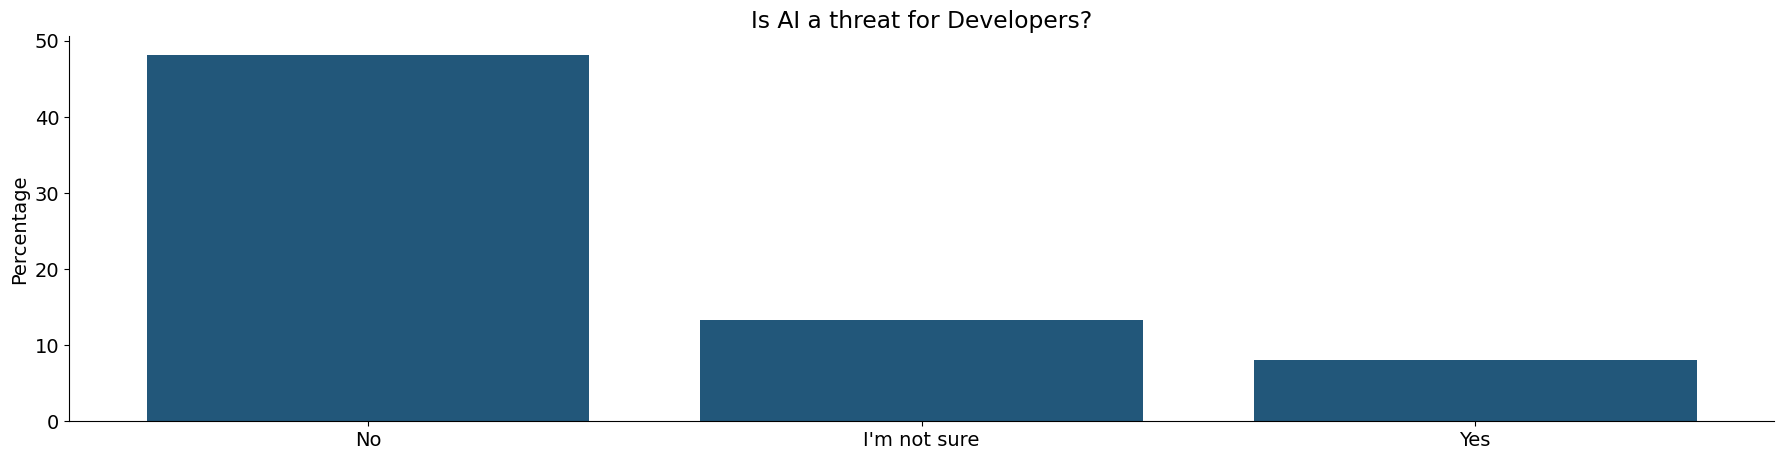

In [38]:
AIThreat = pd.DataFrame(developers['AIThreat'].value_counts()/len(developers)*100).reset_index().rename(columns={'count': 'Percentage'})
plt.bar(x=AIThreat['AIThreat'], height=AIThreat['Percentage'], color='#22577A')
plt.title('Is AI a threat for Developers?')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.show()

**INSIGHT**

- 48% Developers Think AI Is not a threat

**Which method is being used the most by the developers to learn coding?**

In [39]:
platforms = developers['LearnCodeOnline'].str.split(";", expand=True)
platforms_used = np.where(platforms.notna(), platforms,None)
round(pd.Series([i for i in platforms_used.ravel() if i != None]).value_counts()/len(developers)*100,2).to_frame()\
        .reset_index().rename_axis(columns=None).rename(columns={'index':'Database', 'count':'Percent'}).head(10)

,Database,Percent
0,Technical documentation,65.02
1,Stack Overflow,60.98
2,Written Tutorials,52.58
3,Blogs,48.64
4,How-to videos,40.61
5,Video-based Online Courses,38.33
6,Books,36.26
7,Social Media,30.67
8,AI,27.35
9,Written-based Online Courses,25.56


**INSIGHT**

- Most devs learn from the technical documentation, Stack Overflow and Written Tutorials.

**How much time developers take in searching answers and answering others questions?**

In [40]:
searching = round(developers['TimeSearching'].value_counts()/len(developers)*100,2)\
        .to_frame().reset_index().rename(columns={'count':'Percentage'})
answering = round(developers['TimeAnswering'].value_counts()/len(developers)*100,2)\
                .to_frame().reset_index().rename(columns={'count':'Percentage'})
searching.merge(answering, left_on='TimeSearching', right_on='TimeAnswering')\
        .rename(columns={'TimeSearching':'Time', 'Percentage_x':'SearchPercent', 
                         'Percentage_y':'AnswerPercent'})[['Time', 'SearchPercent', 'AnswerPercent']]

,Time,SearchPercent,AnswerPercent
0,30-60 minutes a day,20.03,15.63
1,15-30 minutes a day,14.28,17.25
2,60-120 minutes a day,9.55,6.56
3,Less than 15 minutes a day,4.85,10.92
4,Over 120 minutes a day,3.87,2.10


**Education Level Distribution**

In [41]:
round(developers['EdLevel'].value_counts()/len(developers)*100,2)

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          42.62
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       26.19
Some college/university study without earning a degree                                10.92
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5.38
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         3.82
Associate degree (A.A., A.S., etc.)                                                    2.85
Something else                                                                         1.10
Primary/elementary school                                                              0.60
Name: count, dtype: float64

**INSIGHT**

- Most of the devs have got a Bachelors degree (related or unrelated)

**Find the top countries where the most developers are**

In [42]:
pivot = developers.pivot_table(index='Country',columns='DevType', 
                                aggfunc='size', fill_value=0).reset_index().rename_axis(columns=None)
pivot['Total'] = pivot.set_index('Country').sum(axis=1).astype(int).values
pivot = pivot.sort_values(by='Total', ascending=False).reset_index(drop=True)
pivot

,Country,Academic researcher,Blockchain,Cloud infrastructure engineer,Data engineer,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,...,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator,Total
0,United States of America,98,18,124,225,51,168,20,10,123,...,246,12,24,155,44,41,145,114,31,8494
1,Germany,82,7,52,56,11,78,6,4,80,...,104,10,22,74,7,14,28,115,10,3751
2,India,8,12,16,71,12,56,1,2,31,...,53,15,19,45,1,5,31,74,3,3027
3,United Kingdom of Great Britain and Northern I...,15,6,27,64,9,44,2,2,39,...,70,7,4,43,11,11,39,39,3,2493
4,Ukraine,6,24,16,53,6,32,0,1,36,...,26,2,3,19,0,3,9,20,5,2223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Botswana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
172,Sierra Leone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
173,Dominica,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
174,Solomon Islands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
print(f"The top 8 country where most of the developers are :\n{pivot['Country'].head(8).tolist()}")

The top 8 country where most of the developers are :
['United States of America', 'Germany', 'India', 'United Kingdom of Great Britain and Northern Ireland', 'Ukraine', 'France', 'Canada', 'Poland']


**What is the distribution of developer type in Top 3 countries?**

In [44]:
countries = ['United States of America', 'Germany', 'India']
developers.pivot_table(index='DevType',columns='Country', 
                                aggfunc='size', fill_value=0).reset_index()\
                                .rename_axis(columns=None).set_index('DevType')[countries].reset_index()

,DevType,United States of America,Germany,India
0,Academic researcher,98,82,8
1,Blockchain,18,7,12
2,Cloud infrastructure engineer,124,52,16
3,Data engineer,225,56,71
4,Data or business analyst,51,11,12
5,Data scientist or machine learning specialist,168,78,56
6,Database administrator,20,6,1
7,Designer,10,4,2
8,DevOps specialist,123,80,31
9,Developer Advocate,22,8,4


- Data scientist or machine learning specialist, Cloud Infra Engineer and Data Engineer are lot less in India 
- There are decent amount of front end devs, Blockchain devs in India as Compared to USA
- India has the most amount of devs in mobile development

**What Collab Tools Developers Usually Work With??**

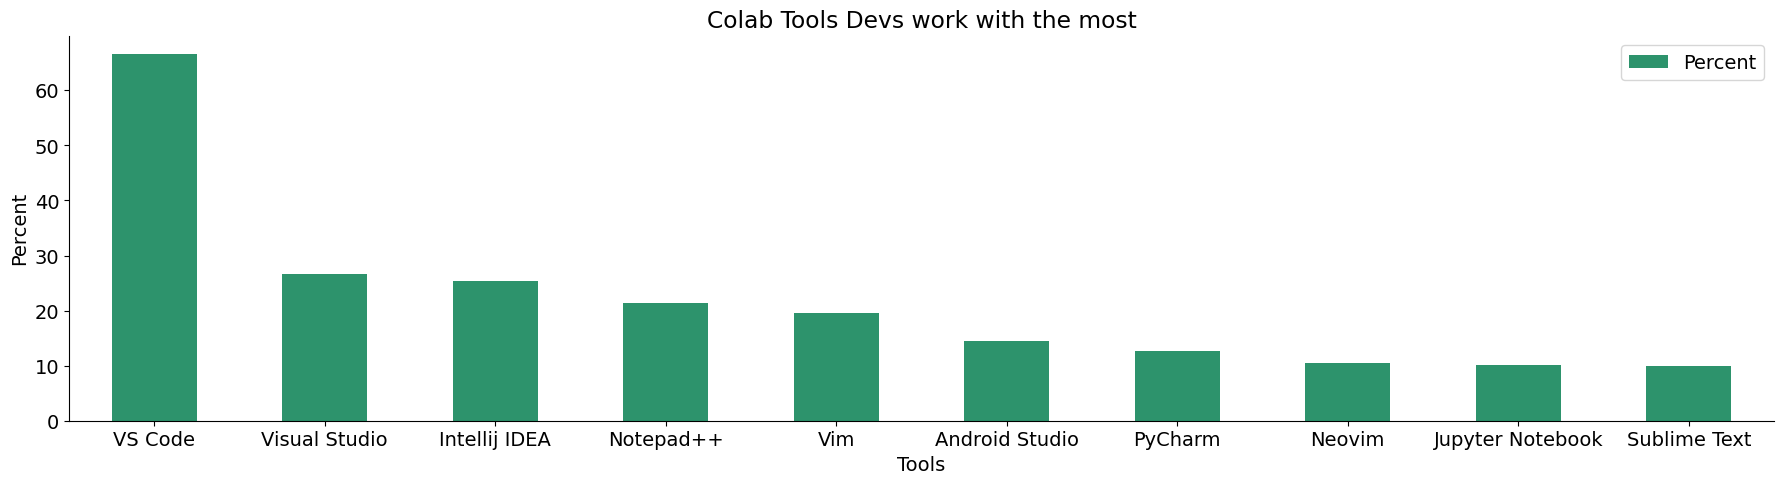

In [45]:
LABELS = ['VS Code', 'Visual Studio', 'Intellij IDEA', 'Notepad++', 
                                'Vim', 'Android Studio', 'PyCharm', 'Neovim', 'Jupyter Notebook', 'Sublime Text']
tools = developers['NEWCollabToolsHaveWorkedWith'].str.split(";", expand=True)
tools_used = np.where(tools.notna(), tools,None)
round(pd.Series([i for i in tools_used.ravel() if i != None]).value_counts()/len(developers)*100,2)\
        .to_frame()\
        .reset_index()\
        .rename_axis(columns=None)\
        .rename(columns={'index':'Tools', 'count':'Percent'})\
        .head(10).set_index('Tools')\
        .plot(kind='bar', color='#2D936C')
plt.xticks(rotation=0, ticks=range(len(LABELS)), labels=LABELS)
plt.title('Colab Tools Devs work with the most')
plt.ylabel('Percent')
plt.show()

## INSIGHTS

- **Developer Demographics**: The majority of developers fall within the 18 to 54 age range, with a notable portion of respondents identifying as professional developers. Age distribution remains consistent across both professional and non-professional developers.

- **Work Preferences and Compensation**: A significant share of developers work remotely, with larger organizations dominating the respondent pool. Compensation trends show that most developers earn within the $70,000 range, and those earning above this level typically have over 10 years of experience.

- **Job Satisfaction**: Around 25% of developers report being highly satisfied with their jobs, highlighting a generally positive outlook among the community.

- **Technical Skills and Preferences**: JavaScript and PostgreSQL remains the most commonly used language, followed by other HTML/CSS and Python. Developers however also want to start working with languages like Rust, Go and databases like Redis and Microsoft SQL Server.  

- **Tools and Collaboration**: Popular tools include VS Code, Git, and Jupyter Notebook. There is also significant participation in open-source projects among professional developers.

- **Learning and Productivity**: Developers mostly learn coding through online resources and spend a considerable amount of time searching for solutions and helping others. This demonstrates a strong culture of continuous learning and knowledge-sharing within the community.

- **Regional Trends**: Germany, India and the USA stand out as leading countries for developer count, with different regions showing unique distributions in developer roles, such as mobile development in India and cloud infrastructure in the USA.

- **AI Threat**: With the advent of AI in our lives, there has been a threat that AI will take away their jobs however as per the data, 48% of the devs think that AI is not a threat to their jobs.

## Conclusion:

The 2024 Stack Overflow survey results provide a comprehensive view of the global developer landscape. From demographics and compensation to work habits and technical preferences, the analysis sheds light on the diverse experiences of developers worldwide. Developers are embracing remote work, continuously learning, and contributing to both their jobs and the open-source community. As technology evolves, developers are keen to upskill and experiment with new tools and languages, highlighting a vibrant and dynamic profession that adapts to new challenges and opportunities.